In [2]:
# Download the movie ratings and IMDB movie titles from the sample datasets collection
from azureml import Workspace

ws = Workspace()
dsRatings = ws.datasets['Movie Ratings']
ratings = dsRatings.to_dataframe()

dsMovies = ws.datasets['Movie Names']
movies = dsMovies.to_dataframe()

In [3]:
# Examine the first few rows in each dataset
print(ratings.head())
print()
print(movies.head())

   UserId  MovieId  Rating   Timestamp
0       1    68646      10  1381620027
1       1   113277      10  1379466669
2       2   454876       8  1394818630
3       2   790636       7  1389963947
4       2   816711       8  1379963769

   Movie ID                                     Movie Name
0         8  Edison Kinetoscopic Record of a Sneeze (1894)
1        91                     Le manoir du diable (1896)
2       417                  Le voyage dans la lune (1902)
3       628                        The  s of Dollie (1908)
4       833                      The Country Doctor (1909)


In [4]:
# Rename the columns in the movies dataset and reindex it using the MovieId
# Makes it easier to join the datasets later
movies.rename(columns = {'Movie ID': 'MovieId', 'Movie Name': 'MovieName'}, inplace = True)
movies = movies.set_index('MovieId')
movies.head()

,MovieName
MovieId,
8,Edison Kinetoscopic Record of a Sneeze (1894)
91,Le manoir du diable (1896)
417,Le voyage dans la lune (1902)
628,The s of Dollie (1908)
833,The Country Doctor (1909)


In [7]:
# Import the numpy and pandas modules
import numpy as np
import pandas as pd

In [8]:
# What is the average rating for each movie?
meanRatings = ratings.groupby(['MovieId']).mean()
meanRatings.head()

,UserId,Rating,Timestamp
MovieId,,,
8,3296.0,5.0,1.396981e+09
91,4879.0,6.0,1.385233e+09
417,15463.0,7.0,1.392806e+09
628,13752.0,4.5,1.383588e+09
833,19326.0,3.0,1.385739e+09


In [9]:
# Join the results with the movie data (containing the movie names), and sort by rating
movieData = pd.concat([meanRatings, movies], axis = 1).sort_values(['Rating'], ascending = False)
del movieData['UserId']
del movieData['Timestamp']
movieData

,Rating,MovieName
MovieId,,
283742,10.0,Inspiraciï¿½n (2001)
2461862,10.0,The Oscars (2013)
2374002,10.0,Minte-ma frumos (2012)
119843,10.0,Oscar and Lucinda (1997)
254481,10.0,Koi... Mil Gaya (2003)
254679,10.0,Pesar-e Mariam (1998)
97202,10.0,Dip huet seung hung (1989)
44860,10.0,The Lusty Men (1952)
44821,10.0,Lambert the Sheepish Lion (1952) Animation


In [10]:
# How frequently do viewers post ratings?

# Step 1: Reorganize the ratings data to index by the timestamp
ratings.index = ratings.Timestamp
ratings.index = ratings.index.astype('datetime64[s]')
ratings.index
del ratings['Timestamp']
ratings.head()

,UserId,MovieId,Rating
Timestamp,,,
2013-10-12 23:20:27,1,68646,10
2013-09-18 01:11:09,1,113277,10
2014-03-14 17:37:10,2,454876,8
2014-01-17 13:05:47,2,790636,7
2013-09-23 19:16:09,2,816711,8


In [11]:
# Step 2: Count the number of ratings for each day ('D')
dailyRatings = ratings.resample('D').count()
del dailyRatings['UserId']
del dailyRatings['MovieId']
dailyRatings.rename(columns = {'Rating': 'NumRatings'}, inplace = True)
dailyRatings.head()

,NumRatings
Timestamp,
2013-02-28,245
2013-03-01,509
2013-03-02,672
2013-03-03,905
2013-03-04,570


In [13]:
import warnings
warnings.filterwarnings("ignore")

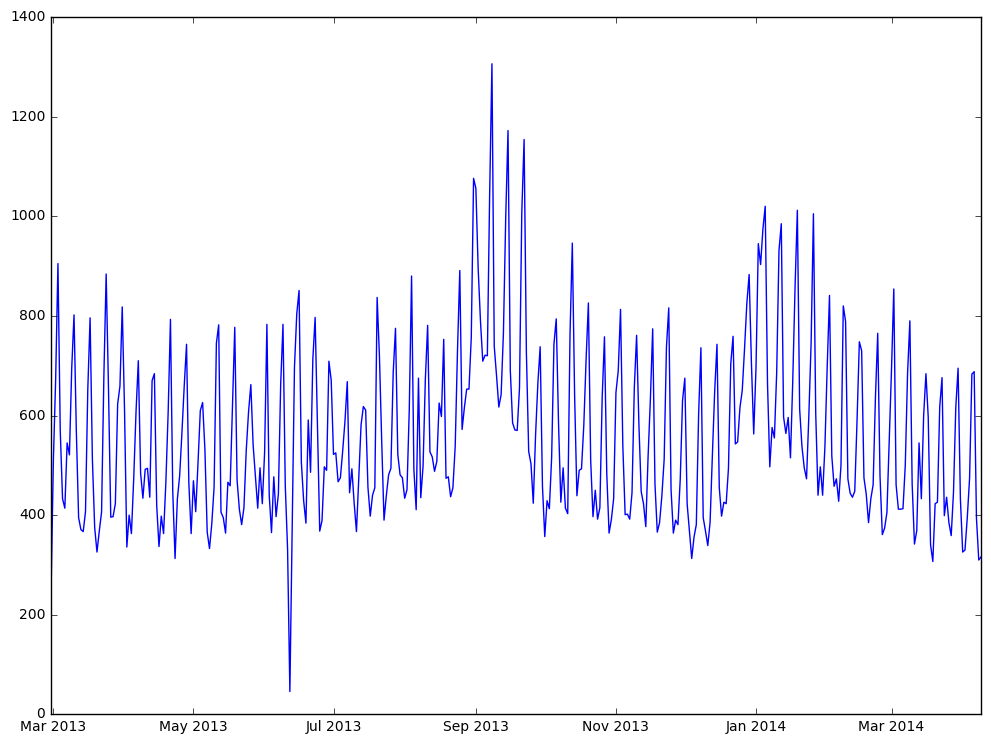

In [14]:
#Step 3: Graph the results
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

plt.rcParams["figure.figsize"] = [12, 9] 
plt.plot(dailyRatings)